In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/proximo-hit-spotify/sample_submission.csv
/kaggle/input/proximo-hit-spotify/train.csv
/kaggle/input/proximo-hit-spotify/test.csv


# Modelo Preditivo Spotify
Este notebook é dedicado à implementação de um modelo preidtivo análise de um modelo para estimar a popularidade de músicas no Spotify , utilizando técnicas de machine learning. A tarefa envolve a análise de diversas características de cada música, como artistas, álbuns, gêneros, valence, energia, entre outras, para prever quão popular uma faixa será.

# Objetivo
O objetivo desse notebook é fornecer um modelo de machine learning que seja capaz de prever a popularidade de músicas no Spotify. Isso pode ajudar uma gravadora ou equipe de marketing a tomar decisões mais informadas sobre quais músicas, artistas ou gêneros promover.

# Nesse Notebook Será Abordado
##### 1. Limpeza e Tratamento de Valores Nulos da tabela Train 
##### 2. Outliers tabela Train
##### 3. Codificação de Variáveis Categóricas da tabela Train
##### 4. Exploração e Visualização dos Dados
##### 5. Formulação de Hipóteses
##### 6. Construção e Avaliação do Modelo
##### 7. Limpeza e Tratamento de Valores Nulos da tabela Test
##### 8. Codificação de Variáveis Categóricas da tabela Test
##### 9. Finetuning de Hiperparâmetros
##### 10. Arquivo Test
##### 11. Visuzalição tabela Test
##### 12. Tratamento de Valores Nulos tabela Test
##### 13. Codificação de Variáveis Categóricas Tabela  Test
##### 14. Validação na Tabela Teste


# Carregando o dataset
Feita a importação do arquivo para leitura dos dados.

In [2]:
train_data = pd.read_csv('/kaggle/input/proximo-hit-spotify/train.csv')
test_data = pd.read_csv('/kaggle/input/proximo-hit-spotify/test.csv')
submission_data = pd.read_csv('/kaggle/input/proximo-hit-spotify/sample_submission.csv')

# 1. Visualização tabela Train 
Visualização das primeiros 5 linhas do DataFrame. Usada para ter uma visão rápida dos primeiros registros e entender como estão os dados.

In [3]:
train_data.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


Utlizado para ter um resumo da estrutura do DataFrame, incluindo:
* O número total de entradas (linhas).
* O nome de cada coluna e seu tipo de dado (numérico, categórico, booleano, etc.).
* O número de valores não nulos em cada coluna (ou seja, o número de valores disponíveis)

In [4]:
# Ver a estrutura do dataset
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

Fornece um resumo estatístico básico de todas as colunas númericas 

In [5]:
train_data.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,57140.494048,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,32993.196225,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28450.500000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,57234.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,85774.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,113998.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


# 2. Limpeza e Tratamento de Valores Nulos da tabela Train¶
Utilizado para visualizar se tem algum valor nulo 

In [6]:
  # Verificar valores nulos
  null_values_train = train_data.isnull().sum()

print("Valores nulos no arquivo de train:")
print(null_values_train)

Valores nulos no arquivo de train:
track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64


# 3. Outliers tabela Train 
O Boxplot visualizaa a distribuição de todas as colunas numéricas no dataset e identificar possíveis outliers. O boxplot exibe a mediana, quartis e a dispersão dos dados, além de destacar visualmente os outliers como pontos fora da caixa

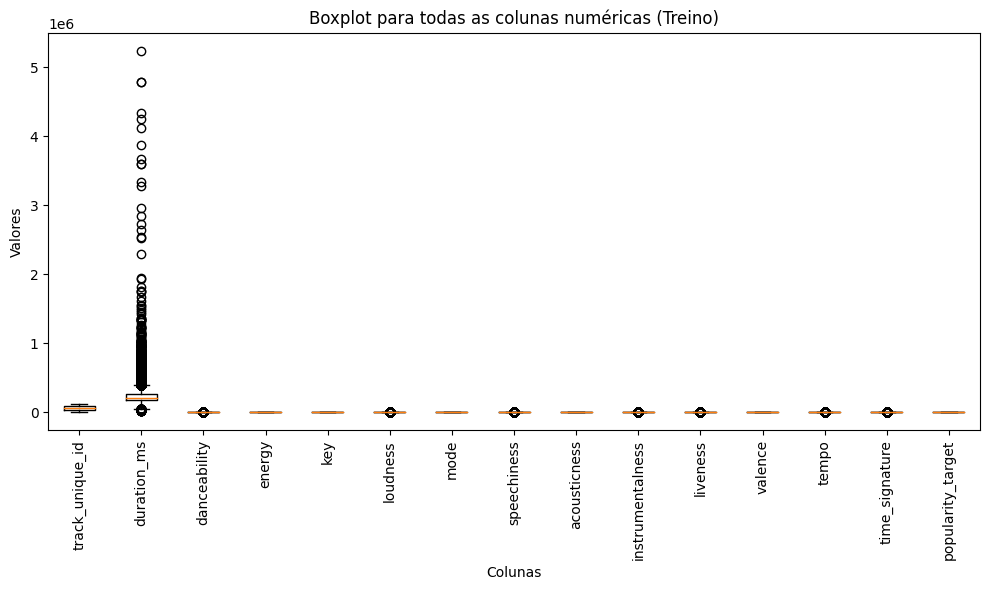

In [7]:


# Listar as colunas numéricas
numeric_columns_train = train_data.select_dtypes(include=['float64', 'int64']).columns

# Gerar um único boxplot para todas as colunas numéricas
plt.figure(figsize=(10, 6))  # Ajustar o tamanho do gráfico
plt.boxplot([train_data[col].dropna() for col in numeric_columns_train])

# Nomear os eixos
plt.title("Boxplot para todas as colunas numéricas (Treino)")
plt.xlabel("Colunas")
plt.ylabel("Valores")

# Definir os nomes das colunas no eixo X
plt.xticks(range(1, len(numeric_columns_train) + 1), numeric_columns_train, rotation=90)

# Exibir o gráfico
plt.tight_layout()
plt.show()


Implementa uma função que remove outliers de uma coluna específica do DataFrame com base no Intervalo Interquartil (IQR). A função primeiro calcula o primeiro quartil (Q1) e o terceiro quartil (Q3) da coluna, e então define um limite inferior e superior para os valores aceitáveis, usando a fórmula 1.5 * IQR. Nesse código os outliers da coluna duration_ms são eliminados, e o código exibe um resumo dos dados após a remoção, além de comparar o número de linhas do DataFrame antes e depois do tratamento.

In [8]:
# Função para remover outliers com base no IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Primeiro quartil (25%)
    Q3 = df[column].quantile(0.75)  # Terceiro quartil (75%)
    IQR = Q3 - Q1  # Intervalo interquartil
    
    # Definir os limites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar os dados, removendo os outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remover os outliers da coluna 'duration_ms'
train_data_cleaned = remove_outliers_iqr(train_data, 'duration_ms')

# Verificar os dados após a remoção
print(train_data_cleaned.describe())

# Comparar o número de linhas antes e depois da remoção dos outliers
print(f"Número de linhas antes da remoção: {len(train_data)}")
print(f"Número de linhas após a remoção: {len(train_data_cleaned)}")

       track_unique_id    duration_ms  danceability        energy  \
count     75810.000000   75810.000000  75810.000000  75810.000000   
mean      57393.443583  214543.098193      0.569246      0.642104   
std       32850.212560   63370.993074      0.170266      0.251031   
min           0.000000   44040.000000      0.000000      0.000019   
25%       29144.250000  172790.750000      0.460000      0.472000   
50%       57528.000000  209860.000000      0.582000      0.686000   
75%       86093.750000  252520.000000      0.694000      0.854000   
max      113998.000000  391895.000000      0.985000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  75810.000000  75810.000000  75810.000000  75810.000000  75810.000000   
mean       5.304683     -8.154992      0.639718      0.084700      0.318047   
std        3.561648      4.993483      0.480085      0.104401      0.331935   
min        0.000000    -49.307000      0.000000      0.000000 

Implementa uma função que remove outliers de uma coluna específica do DataFrame com base no Intervalo Interquartil (IQR). A função primeiro calcula o primeiro quartil (Q1) e o terceiro quartil (Q3) da coluna, e então define um limite inferior e superior para os valores aceitáveis, usando a fórmula 1.5 * IQR. Nesse código os outliers da coluna loudness são eliminados, e o código exibe um resumo dos dados após a remoção, além de comparar o número de linhas do DataFrame antes e depois do tratamento.

In [9]:

# Função para remover outliers com base no IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Primeiro quartil (25%)
    Q3 = df[column].quantile(0.75)  # Terceiro quartil (75%)
    IQR = Q3 - Q1  # Intervalo interquartil
    
    # Definir os limites inferior e superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar os dados para manter apenas os valores dentro dos limites
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remover outliers da coluna 'loudness'
train_data_cleaned = remove_outliers_iqr(train_data, 'loudness')

# Verificar os dados após a remoção dos outliers
print(train_data_cleaned.describe())

# Comparar o número de linhas antes e depois da remoção dos outliers
print(f"Número de linhas antes da remoção: {len(train_data)}")
print(f"Número de linhas após a remoção: {len(train_data_cleaned)}")

       track_unique_id   duration_ms  danceability        energy  \
count     75449.000000  7.544900e+04  75449.000000  75449.000000   
mean      57235.244536  2.284477e+05      0.579250      0.669512   
std       32881.298150  1.011309e+05      0.164382      0.224828   
min           0.000000  1.782600e+04      0.000000      0.000019   
25%       29011.000000  1.763600e+05      0.472000      0.509000   
50%       57049.000000  2.136930e+05      0.590000      0.704000   
75%       85952.000000  2.614260e+05      0.701000      0.861000   
max      113998.000000  5.237295e+06      0.985000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  75449.000000  75449.000000  75449.000000  75449.000000  75449.000000   
mean       5.332662     -7.393238      0.635979      0.085601      0.284036   
std        3.566542      3.380475      0.481158      0.104771      0.309889   
min        0.000000    -17.515000      0.000000      0.000000      0.00

Implementa uma função que remove outliers de uma coluna específica do DataFrame com base no Intervalo Interquartil (IQR). A função primeiro calcula o primeiro quartil (Q1) e o terceiro quartil (Q3) da coluna, e então define um limite inferior e superior para os valores aceitáveis, usando a fórmula 1.5 * IQR. Nesse código os outliers da coluna tempo são eliminados, e o código exibe um resumo dos dados após a remoção, além de comparar o número de linhas do DataFrame antes e depois do tratamento.

In [10]:

# Função para remover outliers com base no IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Primeiro quartil (25%)
    Q3 = df[column].quantile(0.75)  # Terceiro quartil (75%)
    IQR = Q3 - Q1  # Intervalo interquartil
    
    # Definir os limites inferior e superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar os dados para remover outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remover outliers da coluna 'tempo'
train_data_cleaned = remove_outliers_iqr(train_data, 'tempo')

# Verificar os dados após a remoção dos outliers
print(train_data_cleaned.describe())

# Comparar o número de linhas antes e depois da remoção dos outliers
print(f"Número de linhas antes da remoção: {len(train_data)}")
print(f"Número de linhas após a remoção: {len(train_data_cleaned)}")


       track_unique_id   duration_ms  danceability        energy  \
count     79376.000000  7.937600e+04  79376.000000  79376.000000   
mean      57060.528006  2.281078e+05      0.568702      0.642365   
std       32979.555443  1.044529e+05      0.171808      0.250787   
min           0.000000  1.745300e+04      0.053200      0.000020   
25%       28387.750000  1.746130e+05      0.457000      0.473000   
50%       57107.000000  2.129880e+05      0.581500      0.686000   
75%       85655.250000  2.616160e+05      0.696000      0.854000   
max      113998.000000  5.237295e+06      0.985000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  79376.000000  79376.000000  79376.000000  79376.000000  79376.000000   
mean       5.305319     -8.245311      0.637195      0.084746      0.314400   
std        3.561756      5.002691      0.480812      0.105507      0.332326   
min        0.000000    -46.591000      0.000000      0.022100      0.00

# 4. Codificação de Variáveis Categóricas 
A codificação de variáveis categóricas é usada para transformar dados categóricos (texto) em valores numéricos, permitindo que algoritmos de machine learning possam processá-los.

Esse código mostra quais colunas categóricas tem no dataset

In [11]:
# Identificar colunas categóricas
colunas_categoricas = train_data.select_dtypes(include=['object']).columns
print(f"Colunas categóricas identificadas: {list(colunas_categoricas)}")



Colunas categóricas identificadas: ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']


Esse código realiza a codificação de variáveis categóricas usando Target Encoding. Para cada coluna categórica especificada (como track_id, artists, album_name, etc.), o código calcula a média da variável alvo (popularity_target) para cada categoria. Em seguida, ele cria uma nova coluna com o sufixo _encoded, onde cada valor categórico é substituído pela média da popularidade correspondente àquela categoria. Isso permite transformar as variáveis categóricas em valores numéricos baseados na relação dessas categorias com a variável alvo, sem modificar as colunas originais.

In [12]:
# Lista das colunas categóricas para codificação
colunas_categoricas = ['track_id','artists', 'album_name', 'track_name', 'track_genre']

# Variável alvo (target)
target_column = 'popularity_target'

# Loop para codificar as colunas categóricas e criar novas colunas
for coluna in colunas_categoricas:
    # Calcular a média do target para cada categoria da coluna
    category_means = train_data_cleaned.groupby(coluna)[target_column].mean()

    # Garantir que a coluna original não será modificada criando uma nova com '_encoded'
    train_data_cleaned[coluna + '_encoded'] = train_data_cleaned[coluna].map(category_means)

# Exibir as primeiras linhas para garantir que as colunas originais não foram alteradas e as codificadas foram criadas
train_data_cleaned.head()

/tmp/ipykernel_17/4026713711.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned[coluna + '_encoded'] = train_data_cleaned[coluna].map(category_means)
/tmp/ipykernel_17/4026713711.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned[coluna + '_encoded'] = train_data_cleaned[coluna].map(category_means)
/tmp/ipykernel_17/4026713711.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,valence,tempo,time_signature,track_genre,popularity_target,track_id_encoded,artists_encoded,album_name_encoded,track_name_encoded,track_genre_encoded
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,0.3200,141.793,4,goth,0,0.0,0.000000,0.000000,0.0,0.197917
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0.1330,83.685,4,opera,0,0.0,0.000000,0.000000,0.0,0.176554
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,0.5440,90.459,3,idm,1,1.0,0.294118,1.000000,1.0,0.094946
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,0.0387,69.442,3,classical,0,0.0,0.000000,0.000000,0.0,0.108883
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,0.1710,137.981,4,techno,0,0.0,0.059829,0.166667,0.0,0.642755


In [13]:
# Variável alvo (target)
#target_column = 'popularity_target'

# Para cada coluna categórica, realizar o Target Encoding
#for coluna in colunas_categoricas:
    # Calcular a média do target para cada categoria
   # category_means = train_data_cleaned.groupby(coluna)[target_column].mean()
    
    # Substituir as categorias pela média calculada, com tratamento de NaN
   # train_data_cleaned[coluna] = train_data_cleaned[coluna].map(category_means).fillna(0)  # Preencher NaN com 0 ou outro valor padrão

# Exibir as primeiras linhas após a codificação
#train_data_cleaned.head()

In [14]:
# # Converter a coluna 'explicit' de True/False para 1/0
# train_data_cleaned['explicit'] = train_data_cleaned['explicit'].astype(int)

# 5. Exploração e Visualização dos Dados 
A exploração de dados serve para entender melhor o comportamento dos dados, identificar padrões, correlações e possíveis outliers. Por meio de análises estatísticas e visualizações, como gráficos e histogramas, é possível descobrir tendências importantes e tomar decisões informadas sobre quais features são relevantes e quais modelos de machine learning podem ser mais adequados. 

Esse código serve para visualizar a distribuição das variáveis numéricas no dataset através de histogramas. Ele plota a distribuição de cada variável listada em numeric_columns (como duration_ms, danceability, energy, etc.) para mostrar como os valores dessas variáveis estão distribuídos, ajudando a identificar padrões, como assimetria, distribuições normais, ou a presença de outliers. 

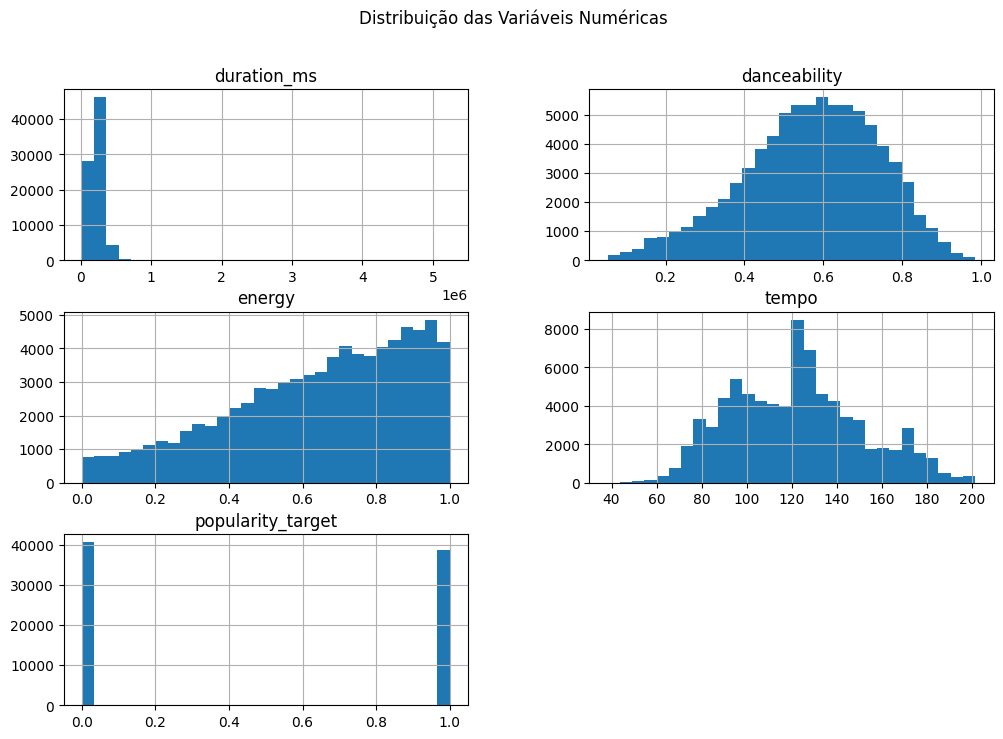

In [15]:
# Visualizar a distribuição de variáveis numéricas
numeric_columns = ['duration_ms', 'danceability', 'energy', 'tempo', 'popularity_target']
train_data_cleaned[numeric_columns].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

Esse código cria boxplots para visualizar a relação entre as variáveis numéricas danceability e energy com a variável alvo popularity_target
1. O primeiro gráfico mostra como os valores de danceability (capacidade de dançar a música) variam em diferentes níveis de popularity_target (popularidade).
2. O segundo gráfico faz o mesmo para a variável energy, mostrando como os níveis de energia das músicas se distribuem em relação à sua popularidade.


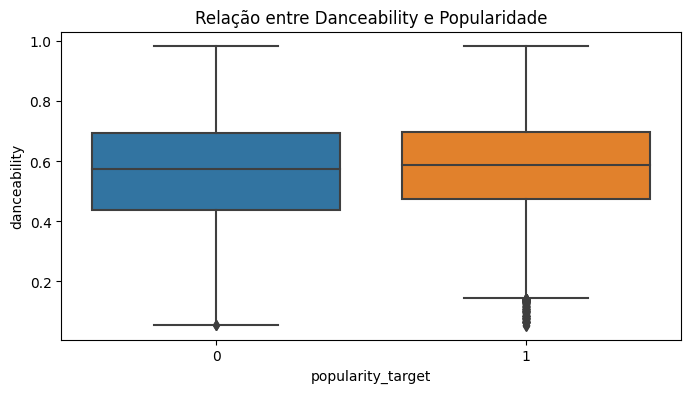

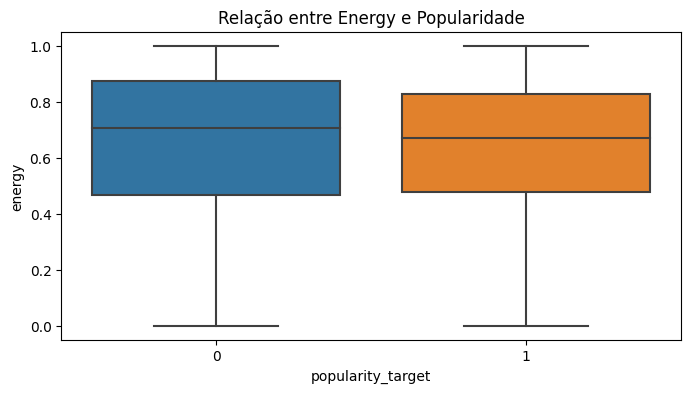

In [16]:
# Exemplo: Relação entre 'danceability' e 'popularity_target'
plt.figure(figsize=(8, 4))
sns.boxplot(x='popularity_target', y='danceability', data=train_data_cleaned)
plt.title('Relação entre Danceability e Popularidade')
plt.show()

# Exemplo: Relação entre 'energy' e 'popularity_target'
plt.figure(figsize=(8, 4))
sns.boxplot(x='popularity_target', y='energy', data=train_data_cleaned)
plt.title('Relação entre Energy e Popularidade')
plt.show()

Esse código cria boxplots para visualizar a relação entre as variáveis numéricas valence (que indica a positividade da música) e tempo (batidas por minuto) com a variável alvo popularity_target (popularidade da música).

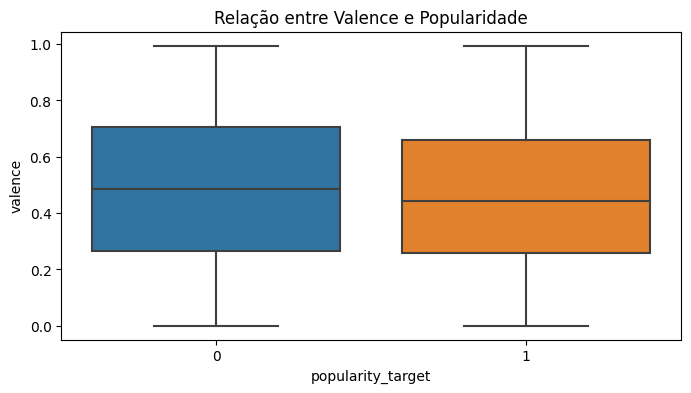

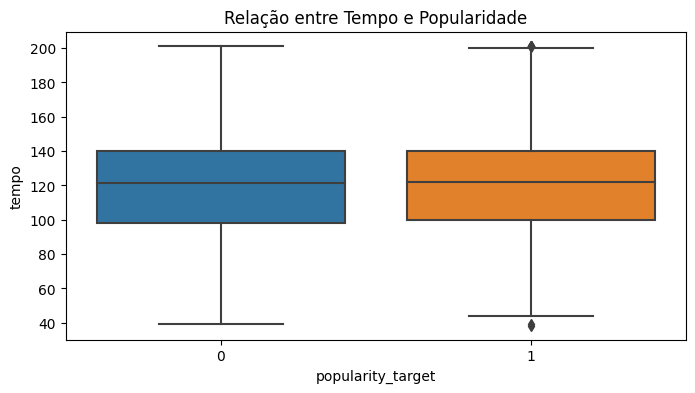

In [17]:
# Exemplo: Relação entre 'valence' (positividade da música) e 'popularity_target'
plt.figure(figsize=(8, 4))
sns.boxplot(x='popularity_target', y='valence', data=train_data_cleaned)
plt.title('Relação entre Valence e Popularidade')
plt.show()

# Exemplo: Relação entre 'tempo' e 'popularity_target'
plt.figure(figsize=(8, 4))
sns.boxplot(x='popularity_target', y='tempo', data=train_data_cleaned)
plt.title('Relação entre Tempo e Popularidade')
plt.show()


Esse código cria uma nova variável chamada dance_energy, que é uma combinação das variáveis danceability (facilidade para dançar a música) e energy (nível de energia da música). Ele, então, utiliza essa nova variável para criar um boxplot, mostrando como ela se relaciona com a variável alvo popularity_target (popularidade da música).

/tmp/ipykernel_17/1835026363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['dance_energy'] = (train_data_cleaned['danceability'] + train_data_cleaned['energy']) / 2


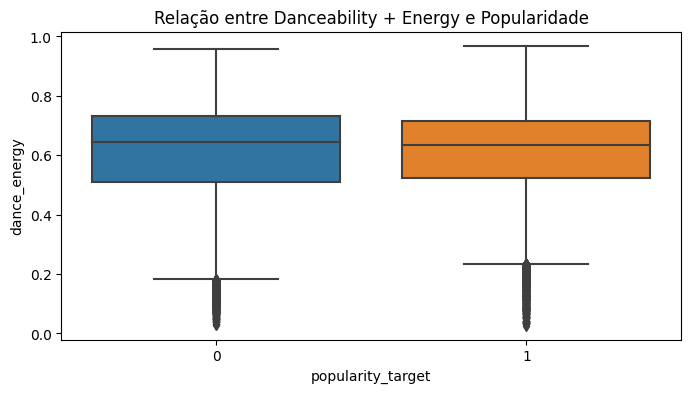

In [18]:
# Criar uma nova variável combinando danceability e energy
train_data_cleaned['dance_energy'] = (train_data_cleaned['danceability'] + train_data_cleaned['energy']) / 2

# Boxplot da nova variável
plt.figure(figsize=(8, 4))
sns.boxplot(x='popularity_target', y='dance_energy', data=train_data_cleaned)
plt.title('Relação entre Danceability + Energy e Popularidade')
plt.show()


Esse código cria dois gráficos de barras usando countplot do Seaborn para visualizar a frequência dos gêneros musicais e dos artistas mais presentes no dataset. O objetivo é entender a distribuição dos gêneros e artistas no dataset, destacando quais gêneros e artistas são mais representados. Isso pode fornecer insights importantes, como identificar vieses ou concentrar a análise em gêneros/artistas mais populares.

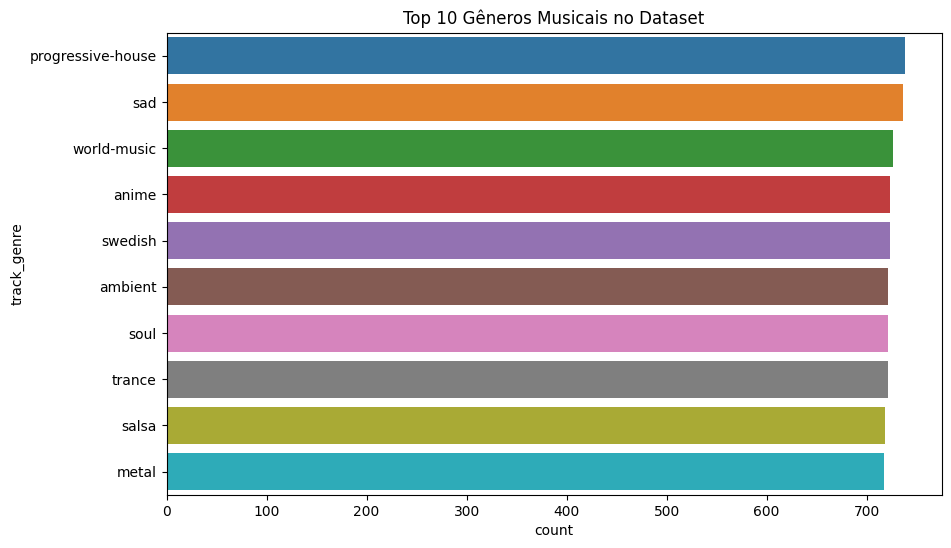

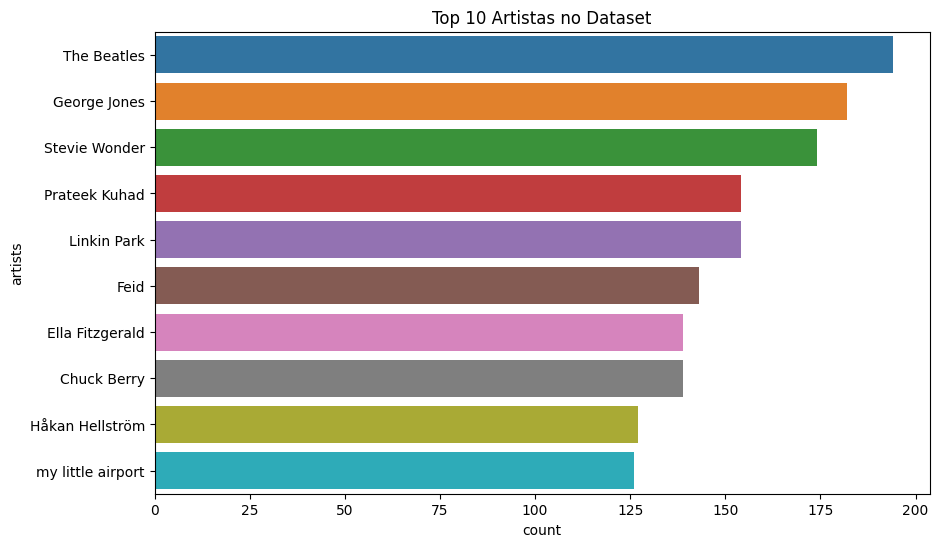

In [19]:
# Frequência dos gêneros
plt.figure(figsize=(10, 6))
sns.countplot(y='track_genre', data=train_data_cleaned, order=train_data_cleaned['track_genre'].value_counts().index[:10])
plt.title('Top 10 Gêneros Musicais no Dataset')
plt.show()

# Frequência dos artistas
plt.figure(figsize=(10, 6))
sns.countplot(y='artists', data=train_data_cleaned, order=train_data_cleaned['artists'].value_counts().index[:10])
plt.title('Top 10 Artistas no Dataset')
plt.show()

Esse código cria um gráfico de barras que visualiza a distribuição dos gêneros musicais (variável track_genre) e como eles se dividem de acordo com a popularidade das músicas (variável popularity_target). O objetivo  é analisar a relação entre os gêneros musicais e a popularidade. Ele permite identificar, por exemplo, quais gêneros têm mais músicas populares ou menos populares, ajudando a entender se certos gêneros estão mais associados ao sucesso (ou falta de sucesso) no dataset.

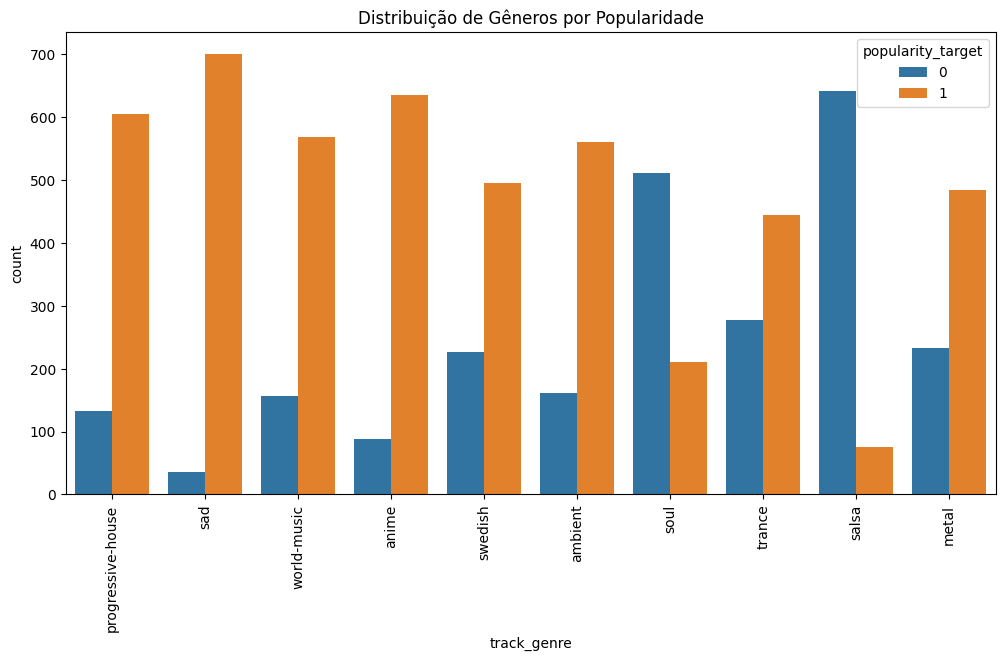

In [20]:
# Visualizar a distribuição de 'track_genre' dividido por 'popularity_target'
plt.figure(figsize=(12, 6))
sns.countplot(x='track_genre', hue='popularity_target', data=train_data_cleaned, order=train_data_cleaned['track_genre'].value_counts().index[:10])
plt.title('Distribuição de Gêneros por Popularidade')
plt.xticks(rotation=90)
plt.show()

Esse código cria m gráfico de barras que visualiza a distribuição dos artistas (variável artists) e como as músicas de cada artista se dividem de acordo com a popularidade (variável popularity_target). O objetivo é analisar a relação entre artistas e a popularidade de suas músicas. Ele permite identificar se certos artistas têm uma tendência a produzir músicas mais populares ou menos populares, ajudando a compreender como a popularidade varia entre os principais artistas do dataset.

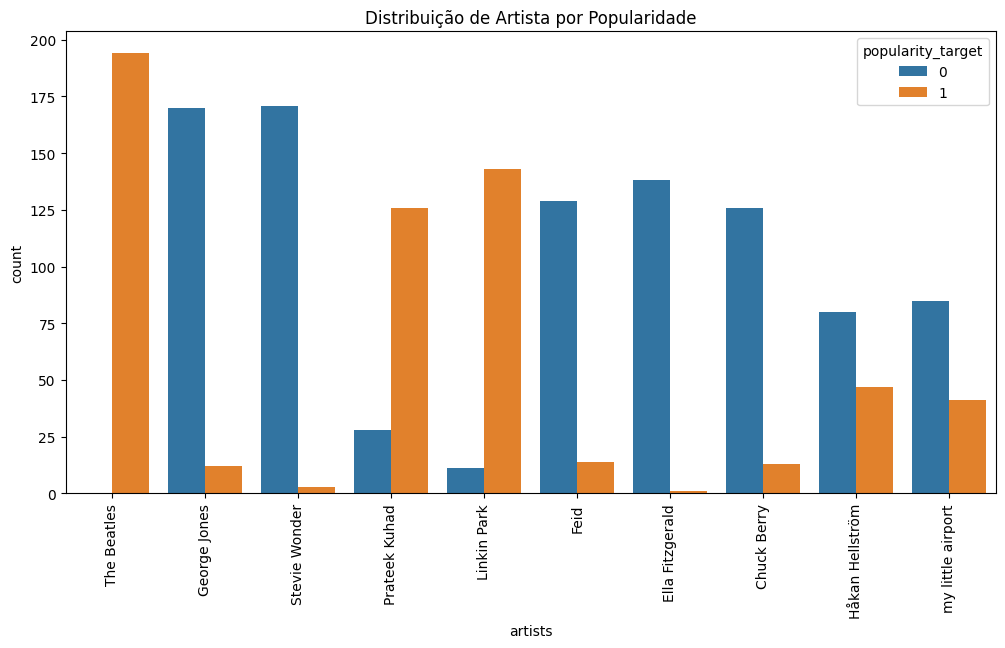

In [21]:
# Visualizar a distribuição de 'track_genre' dividido por 'popularity_target'
plt.figure(figsize=(12, 6))
sns.countplot(x='artists', hue='popularity_target', data=train_data_cleaned, order=train_data_cleaned['artists'].value_counts().index[:10])
plt.title('Distribuição de Artista por Popularidade')
plt.xticks(rotation=90)
plt.show()

Esse código calcula e plota a matriz de correlação entre as variáveis numéricas no dataset, utilizando um gráfico de calor (heatmap). A matriz de correlação ajuda a identificar relações lineares entre diferentes variáveis, indicando como elas se movem juntas.

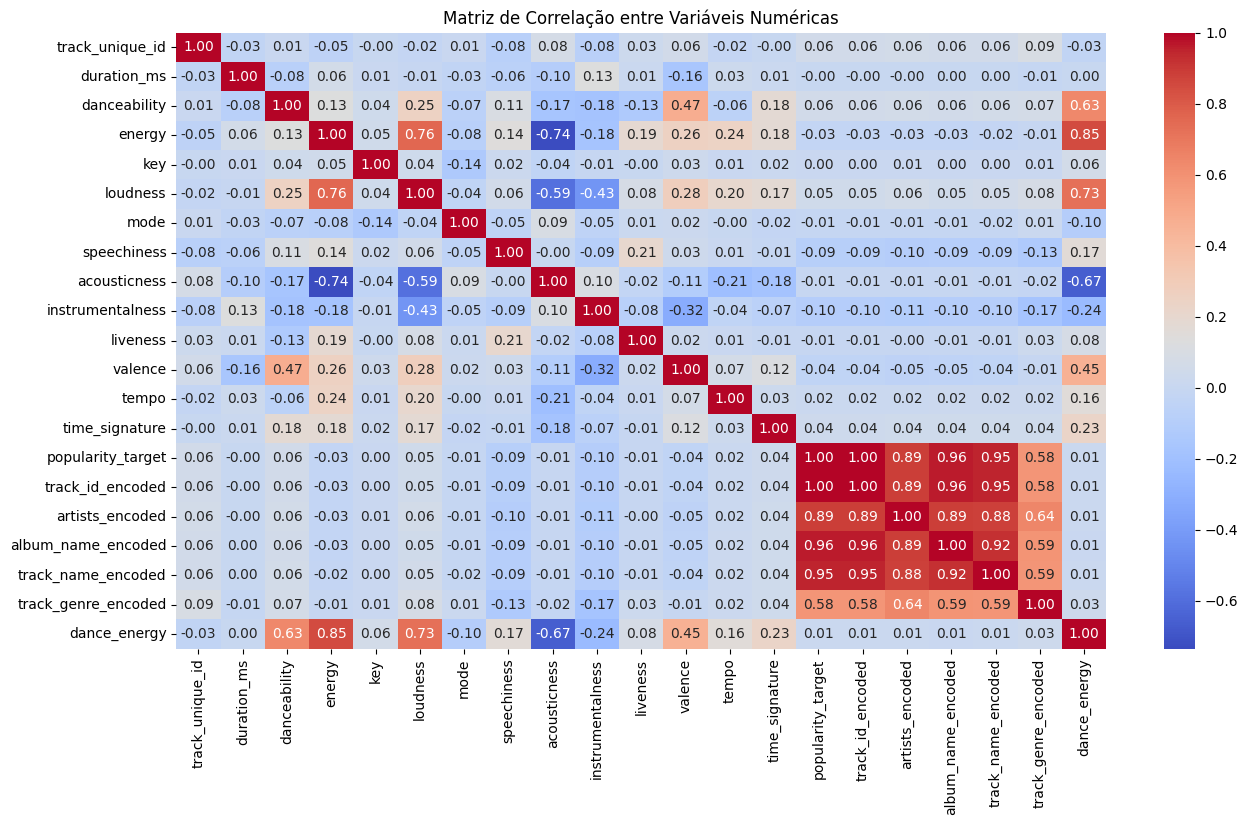

In [22]:
# Selecionar apenas as colunas numéricas
numeric_columns = train_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calcular a matriz de correlação apenas para as colunas numéricas
correlation_matrix = train_data_cleaned[numeric_columns].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()


# 6.Hipotese 
1. Músicas com maior "valence" (positividade) e maior "tempo" (batidas por minuto) tendem a ser mais populares.
2. Artistas como "The Beatles" e "George Jones" têm mais músicas populares
3. Certos gêneros musicais, como "sad" e "progressive-house", tendem a ser mais populares.

# 7. Seleção de Features


Esse código realiza a remoção de colunas textuais e de identificadores, que não são úteis para o modelo de machine learning, a fim de manter apenas as features numéricas e relevantes. Em seguida, ele treina um modelo de RandomForestRegressor usando os dados filtrados. Após o treinamento, o modelo calcula a importância de cada feature para prever o alvo, e essas importâncias são organizadas e ordenadas em um DataFrame. Por fim, o código exibe as features mais importantes, permitindo identificar quais variáveis têm maior impacto nas previsões.

In [23]:
# Remover apenas as colunas textuais e identificadores
X = train_data_cleaned.drop(['track_name_encoded','popularity_target', 'artists_encoded', 'album_name_encoded', 'track_unique_id', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'track_id_encoded', 'track_genre_encoded'], axis=1)
y = train_data_cleaned['popularity_target']


y

0        0
1        0
2        1
3        0
4        0
        ..
79795    1
79796    0
79797    0
79798    1
79799    1
Name: popularity_target, Length: 79376, dtype: int64

Esse código mostra quais são as 10 features mais importantes 

# 8. Construção e Avaliação do Modelo


Esse código treina um modelo de Random Forest para prever a popularidade de músicas com base em características como "danceability", "energy", e "valence". Ele divide os dados em conjuntos de treino e teste, normaliza os dados e treina o modelo com parâmetros ajustados. Após o treinamento, o modelo é usado para fazer previsões e calcular métricas de desempenho, como acurácia. 

In [24]:


# Imputação de valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Divide os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Cria e treina o modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = rf.predict(X_test)

# Avalia o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Função para prever a popularidade de uma música
def predict_song_popularity(track_name_encoded):
    global imputer, scaler, rf

    # Seleciona as características da música a partir do ID codificado
    song_data = train_data_cleaned[train_data_cleaned['track_name_encoded'] == track_name_encoded].copy()

    # Se o DataFrame estiver vazio, retorna uma mensagem de erro
    if song_data.empty:
        return "Música não encontrada no conjunto de dados."

    # Realinha as colunas para que correspondam ao conjunto de dados original usado
    song_data = song_data.reindex(columns=X.columns, fill_value=0)

    # Imputação e padronização dos dados
    song_data_imputed = imputer.transform(song_data)
    song_data_scaled = scaler.transform(song_data_imputed)

    # Prevê a popularidade da música
    prediction = rf.predict(song_data_scaled)[0]

    if prediction == 1:
        result = "Popular"
    else:
        result = "Não Popular"

    return result

# Testar a função de previsão de popularidade
track_name_encoded_test = 14532  # Exemplo de ID codificado da música
print(predict_song_popularity(track_name_encoded_test))

Acurácia: 0.7554799697656841
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      8070
           1       0.74      0.76      0.75      7806

    accuracy                           0.76     15876
   macro avg       0.76      0.76      0.76     15876
weighted avg       0.76      0.76      0.76     15876

Música não encontrada no conjunto de dados.


In [25]:
# Exemplo de uso
track_name_id = 1  # ID codificado da música
print(predict_song_popularity(track_name_id))

Popular


# 9. Tuning de Hiperparâmetros

Esse código aplica um tuning com o hiperparâmetro `RandomizedSearchCV`, normalmente utilizado para encontrar as melhores combinações de parâmetros de um modelo de ML.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# # Seleciona as features para o modelo
# X = train_data_cleaned[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
#                              'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'explicit']]
# y = train_data_cleaned['popularity_target']

# # Imputação de valores faltantes
# imputer = SimpleImputer(strategy='mean')
# X_imputed = imputer.fit_transform(X)

# # Padronização dos dados
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_imputed)

# # Divide os dados em treino e teste (80% treino, 20% teste)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a grade de hiperparâmetros a serem testados
param_distributions = {
    'n_estimators': [50, 100, 200],           # Número de árvores na floresta
    'max_depth': [10, 20, 30, None],          # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],          # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],            # Número mínimo de amostras em uma folha
    'bootstrap': [True, False]                # Amostragem com ou sem substituição
}

# Inicializa o modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Aplica o RandomizedSearchCV com 5 folds (validação cruzada)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                   n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Treina o modelo com Randomized Search
random_search.fit(X_train, y_train)

# Exibe os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", random_search.best_params_)

# Avalia o modelo com os melhores hiperparâmetros
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Função para prever a popularidade de uma música
def predict_song_popularity(track_name_encoded):
    global imputer, scaler, best_rf

    # Seleciona as características da música a partir do ID codificado
    song_data = train_data_cleaned[train_data_cleaned['track_name_encoded'] == track_name_encoded].copy()

    # Se o DataFrame estiver vazio, retorna uma mensagem de erro
    if song_data.empty:
        return "Música não encontrada no conjunto de dados."

    # Realinha as colunas para que correspondam ao conjunto de dados original usado
    song_data = song_data.reindex(columns=X.columns, fill_value=0)

    # Imputação e padronização dos dados
    song_data_imputed = imputer.transform(song_data)
    song_data_scaled = scaler.transform(song_data_imputed)

    # Prevê a popularidade da música
    prediction = best_rf.predict(song_data_scaled)[0]

    if prediction == 1:
        result = "Popular"
    else:
        result = "Não Popular"

    return result

# Testar a função de previsão de popularidade
track_name_encoded_test = 14  # Exemplo de ID codificado da música
print(predict_song_popularity(track_name_encoded_test))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores Hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': False}
Acurácia: 0.7598261526832956
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      8070
           1       0.74      0.78      0.76      7806

    accuracy                           0.76     15876
   macro avg       0.76      0.76      0.76     15876
weighted avg       0.76      0.76      0.76     15876

Música não encontrada no conjunto de dados.


# 10. Arquivo Test

Feita a importação do arquivo para leitura dos dados.

In [27]:
test_data = pd.read_csv('/kaggle/input/proximo-hit-spotify/test.csv')

# 11. Visuzalição tabela Test

Fornece um resumo estatístico básico de todas as colunas númericas 

In [28]:
test_data.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,34200.000000,3.420000e+04,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000
mean,56670.513889,2.283254e+05,0.565591,0.641041,5.314035,-8.247806,0.637135,0.084423,0.314750,0.153087,0.214113,0.473605,122.314152,3.907485
std,32710.184506,1.123471e+05,0.174544,0.251737,3.554899,5.014973,0.480834,0.105910,0.332552,0.306634,0.191084,0.259849,30.062414,0.428702
min,3.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28612.500000,1.733250e+05,0.455000,0.472000,2.000000,-10.039000,0.000000,0.035800,0.016600,0.000000,0.098200,0.256000,99.537500,4.000000
50%,56475.500000,2.131775e+05,0.579000,0.683000,5.000000,-6.984000,1.000000,0.048700,0.168500,0.000043,0.133000,0.463000,122.052500,4.000000
75%,84855.750000,2.616720e+05,0.693000,0.853000,8.000000,-5.011000,1.000000,0.084700,0.597000,0.045800,0.273000,0.682000,140.204000,4.000000
max,113999.000000,4.730302e+06,0.980000,1.000000,11.000000,1.795000,1.000000,0.963000,0.996000,1.000000,1.000000,0.992000,243.372000,5.000000


Utlizado para ter um resumo da estrutura do DataFrame, incluindo:
* O número total de entradas (linhas).
* O nome de cada coluna e seu tipo de dado (numérico, categórico, booleano, etc.).
* O número de valores não nulos em cada coluna (ou seja, o número de valores disponíveis)

In [29]:
# Ver a estrutura do dataset
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34200 entries, 0 to 34199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_unique_id   34200 non-null  int64  
 1   track_id          34200 non-null  object 
 2   artists           34199 non-null  object 
 3   album_name        34199 non-null  object 
 4   track_name        34199 non-null  object 
 5   duration_ms       34200 non-null  int64  
 6   explicit          34200 non-null  bool   
 7   danceability      34200 non-null  float64
 8   energy            34200 non-null  float64
 9   key               34200 non-null  int64  
 10  loudness          34200 non-null  float64
 11  mode              34200 non-null  int64  
 12  speechiness       34200 non-null  float64
 13  acousticness      34200 non-null  float64
 14  instrumentalness  34200 non-null  float64
 15  liveness          34200 non-null  float64
 16  valence           34200 non-null  float6

# 12. Tratamento de Valores Nulos tabela Test

Utilizado para visualizar se tem algum valor nulo 

In [30]:
  # Verificar valores nulos
  null_values_test = test_data.isnull().sum()

print("Valores nulos no arquivo de teste:")
print(null_values_test)

Valores nulos no arquivo de teste:
track_unique_id     0
track_id            0
artists             1
album_name          1
track_name          1
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Esse código trata os valores nulos nas colunas categóricas do conjunto de dados de teste. Ele preenche os valores ausentes nas colunas artists, album_name e track_name com a string "Unknown", indicando que os valores originais eram desconhecidos ou ausentes. Isso garante que as colunas categóricas não contenham valores nulos, que poderiam causar problemas durante o treinamento ou previsão de modelos de machine learning. 

In [31]:
# Preencher os valores nulos com "Unknown" nas colunas categóricas no arquivo teste
test_data.update(test_data['artists'].fillna('Unknown'))
test_data.update(test_data['album_name'].fillna('Unknown'))
test_data.update(test_data['track_name'].fillna('Unknown'))

# Verificar se os valores nulos foram tratados
null_values_test_after_cleaning = test_data.isnull().sum()
print(null_values_test_after_cleaning)

track_unique_id     0
track_id            0
artists             0
album_name          0
track_name          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


# 13. Codificação de Variáveis Categóricas Tabela  Test
A codificação de variáveis categóricas é usada para transformar dados categóricos (texto) em valores numéricos, permitindo que algoritmos de machine learning possam processá-los

Esse código mostra quais colunas são categórias na tabela test

In [32]:
# Identificar colunas categóricas
colunas_categoricas = test_data.select_dtypes(include=['object']).columns
print(f"Colunas categóricas identificadas: {list(colunas_categoricas)}")



Colunas categóricas identificadas: ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']


Esse código aplica a técnica de Label Encoding para transformar colunas categóricas (como track_id, artists, album_name, track_name, e track_genre) em valores numéricos. O LabelEncoder converte cada valor único em um número inteiro, criando novas colunas com o sufixo _encoded, onde as categorias textuais são substituídas por números. Isso é necessário porque os modelos de machine learning não conseguem trabalhar diretamente com dados categóricos e exigem que as variáveis estejam em formato numérico para realizar cálculos.

In [33]:
# Certifique-se de que você tem a variável test_data já limpa
test_data_cleaned = test_data.copy()  # Crie uma cópia dos dados para limpar e codificar

# Lista das colunas categóricas que você quer codificar
colunas_categoricas = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

# Criar um objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding em cada coluna categórica
for coluna in colunas_categoricas:
    test_data_cleaned[coluna + '_encoded'] = label_encoder.fit_transform(test_data_cleaned[coluna])

# Exibir as primeiras linhas para verificar o resultado
print(test_data_cleaned.head())


   track_unique_id                track_id                     artists  \
0           113186  6KwkVtXm8OUp2XffN5k7lY            Hillsong Worship   
1            42819  2dp5I5MJ8bQQHDoFaNRFtX                Internal Rot   
2            59311  5avw06usmFkFrPjX8NxC40  Zhoobin Askarieh;Ali Sasha   
3            91368  75hT0hvlESnDJstem0JgyR                 Bryan Adams   
4            61000  4bY2oZGA5Br3pTE1Jd1IfY                  Nogizaka46   

                        album_name             track_name  duration_ms  \
0                    No Other Name          No Other Name       440247   
1                   Grieving Birth         Failed Organum        93933   
2             Noise A Noise 20.4-1  Save the Trees, Pt. 1       213578   
3  All I Want For Christmas Is You        Merry Christmas       151387   
4                       バレッタ TypeD                  月の大きさ       236293   

   explicit  danceability  energy  key  ...  liveness  valence    tempo  \
0     False         0.369   0.598  

In [34]:
# Verificar os tipos de dados de cada coluna
print(test_data_cleaned.dtypes)


track_unique_id          int64
track_id                object
artists                 object
album_name              object
track_name              object
duration_ms              int64
explicit                  bool
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
time_signature           int64
track_genre             object
track_id_encoded         int64
artists_encoded          int64
album_name_encoded       int64
track_name_encoded       int64
track_genre_encoded      int64
dtype: object


In [35]:
# Remover as colunas categóricas originais que ainda estão como 'object'
test_data_cleaned = test_data_cleaned.drop(['track_id', 'artists', 'album_name', 'track_name', 'track_genre'], axis=1)

# Verificar o DataFrame para garantir que todas as colunas agora são numéricas
print(test_data_cleaned.dtypes)

# Exibir as primeiras linhas para verificar os dados
print(test_data_cleaned.head())


track_unique_id          int64
duration_ms              int64
explicit                  bool
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
time_signature           int64
track_id_encoded         int64
artists_encoded          int64
album_name_encoded       int64
track_name_encoded       int64
track_genre_encoded      int64
dtype: object
   track_unique_id  duration_ms  explicit  danceability  energy  key  \
0           113186       440247     False         0.369   0.598    7   
1            42819        93933     False         0.171   0.997    7   
2            59311       213578     False         0.173   0.803    9   
3            91368       151387     False         0.683   0.511    6   
4     

## 14. Validação na Tabela Teste
Esse código está treianando o modelo validar os valores no arquivo `test.csv`.
O código faz a imputação m Forest e o avalia com o conjunto de validação. Depois, aplica os mesmos processos de imputação e padronização ao conjunto de teste (test_data) para fazer previsões de popularidade. Por fim, as previsões são salvas em um arquivo CSV e as primeiras linhas do resultado são exibidas.


In [36]:
# Seleciona as features e o alvo (target)
X = train_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'explicit',]]
y = train_data['popularity_target']

# Imputação de valores faltantes e padronização dos dados de treino
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Divide os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treina o modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Avalia o modelo com os dados de validação
y_pred_val = rf.predict(X_val)
print("Acurácia (validação):", accuracy_score(y_val, y_pred_val))
print("Relatório de Classificação (validação):\n", classification_report(y_val, y_pred_val))

# Seleciona as features do test_data (sem a variável alvo)
X_test_data = test_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'explicit',]]

# Usa o mesmo imputador e escalador que foram treinados
X_test_imputed = imputer.transform(X_test_data)
X_test_scaled = scaler.transform(X_test_imputed)

# Faz as previsões no test_data
test_data['popularity_prediction'] = rf.predict(X_test_scaled)

# Salva o arquivo CSV com as predições
test_data[['track_unique_id', 'popularity_prediction']].to_csv('music_predictions.csv', index=False)

# Exibe as primeiras linhas do DataFrame para confirmar que a coluna foi adicionada
print(test_data[['track_unique_id', 'popularity_prediction']].head())


Acurácia (validação): 0.756077694235589
Relatório de Classificação (validação):
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      8247
           1       0.74      0.77      0.75      7713

    accuracy                           0.76     15960
   macro avg       0.76      0.76      0.76     15960
weighted avg       0.76      0.76      0.76     15960

   track_unique_id  popularity_prediction
0           113186                      1
1            42819                      0
2            59311                      0
3            91368                      0
4            61000                      0
